In [1]:
import pandas as pd
df = pd.read_csv('outpt.csv')

In [2]:
df.head()

,sentences,labels
0,"['Intravenous', 'azithromycin', '-', 'induced'...","['O', 'B-drug', 'O', 'O', 'B-effect', 'O']"
1,"['Immobilization', ',', 'while', ""Paget's"", 'b...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,"['Unaccountable', 'severe', 'hypercalcemia', '...","['O', 'O', 'B-effect', 'O', 'O', 'O', 'O', 'O'..."
3,"['METHODS', ':', 'We', 'report', 'two', 'cases...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-effect'..."
4,"['METHODS', ':', 'We', 'report', 'two', 'cases...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-effect'..."


In [3]:
def ret_list(text):
    return eval(text)
df['sentences'] = df['sentences'].apply(ret_list)
df['labels'] = df['labels'].apply(ret_list)

In [4]:
print("Number of training sentences: {:,}\n".format(len(df['sentences'])))

Number of training sentences: 6,908



In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.15, random_state=42)

In [6]:
len(train), len(test)

(5871, 1037)

In [7]:
#train_sentences = train.sentences.to_list()

In [8]:
sentences = train['sentences'].to_list()
labels = train['labels'].to_list()

In [9]:
from transformers import BertTokenizer
import numpy as np
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True)

In [10]:
print(sentences[1])

['We', 'report', 'a', 'case', 'of', 'a', 'patient', 'with', 'rheumatoid', 'arthritis', 'treated', 'with', 'low-dose', 'methotrexate', '(', '15', 'mg/week', ')', 'who', 'developed', 'infection', 'with', 'both', 'M', '.', 'tuberculosis', 'and', 'M', '.', 'chelonae', 'after', 'the', 'revision', 'of', 'a', 'prosthetic', 'hip', '.']


In [11]:
print(tokenizer.encode(sentences[1], add_special_tokens=True))

[101, 1284, 2592, 170, 1692, 1104, 170, 5351, 1114, 100, 100, 5165, 1114, 100, 100, 113, 1405, 100, 114, 1150, 1872, 8974, 1114, 1241, 150, 119, 18436, 1105, 150, 119, 100, 1170, 1103, 16547, 1104, 170, 100, 5110, 119, 102]


In [12]:
print(tokenizer.decode([101, 100, 3189, 1037, 2553, 1997, 1037, 5776, 2007, 100, 27641, 5845, 2007, 100, 100, 1006, 2321, 100, 1007, 2040, 2764, 8985, 2007, 2119, 100, 1012, 15877, 1998, 100, 1012, 100, 2044, 1996, 13921, 1997, 1037, 100, 5099, 1012, 102]))

[CLS] [UNK] review 月age 1990 月 Finlandde [UNK] observes meetingsde [UNK] [UNK] 土 battle [UNK] 城 songs meaningifyingde Well [UNK] 夫 Pitt Club [UNK] 夫 [UNK] dead deep Ricardo 1990 月 [UNK] count 夫 [SEP]


In [13]:
TokenLength = [len(tokenizer.encode(' '.join(i),add_special_tokens=True)) for i in sentences]

In [14]:
print("Minimum length: {:,} tokens".format(min(TokenLength)))
print("Maximum length: {:,} tokens".format(max(TokenLength)))
print("Average length: {:,} tokens".format(int(np.median(TokenLength))))



Minimum length: 6 tokens
Maximum length: 122 tokens
Average length: 37 tokens


C:\Users\jonlc\AppData\Local\Temp\ipykernel_28444\2627285073.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TokenLength, kde=False, rug=False, color="plum")


Text(0, 0.5, '# of sentences')

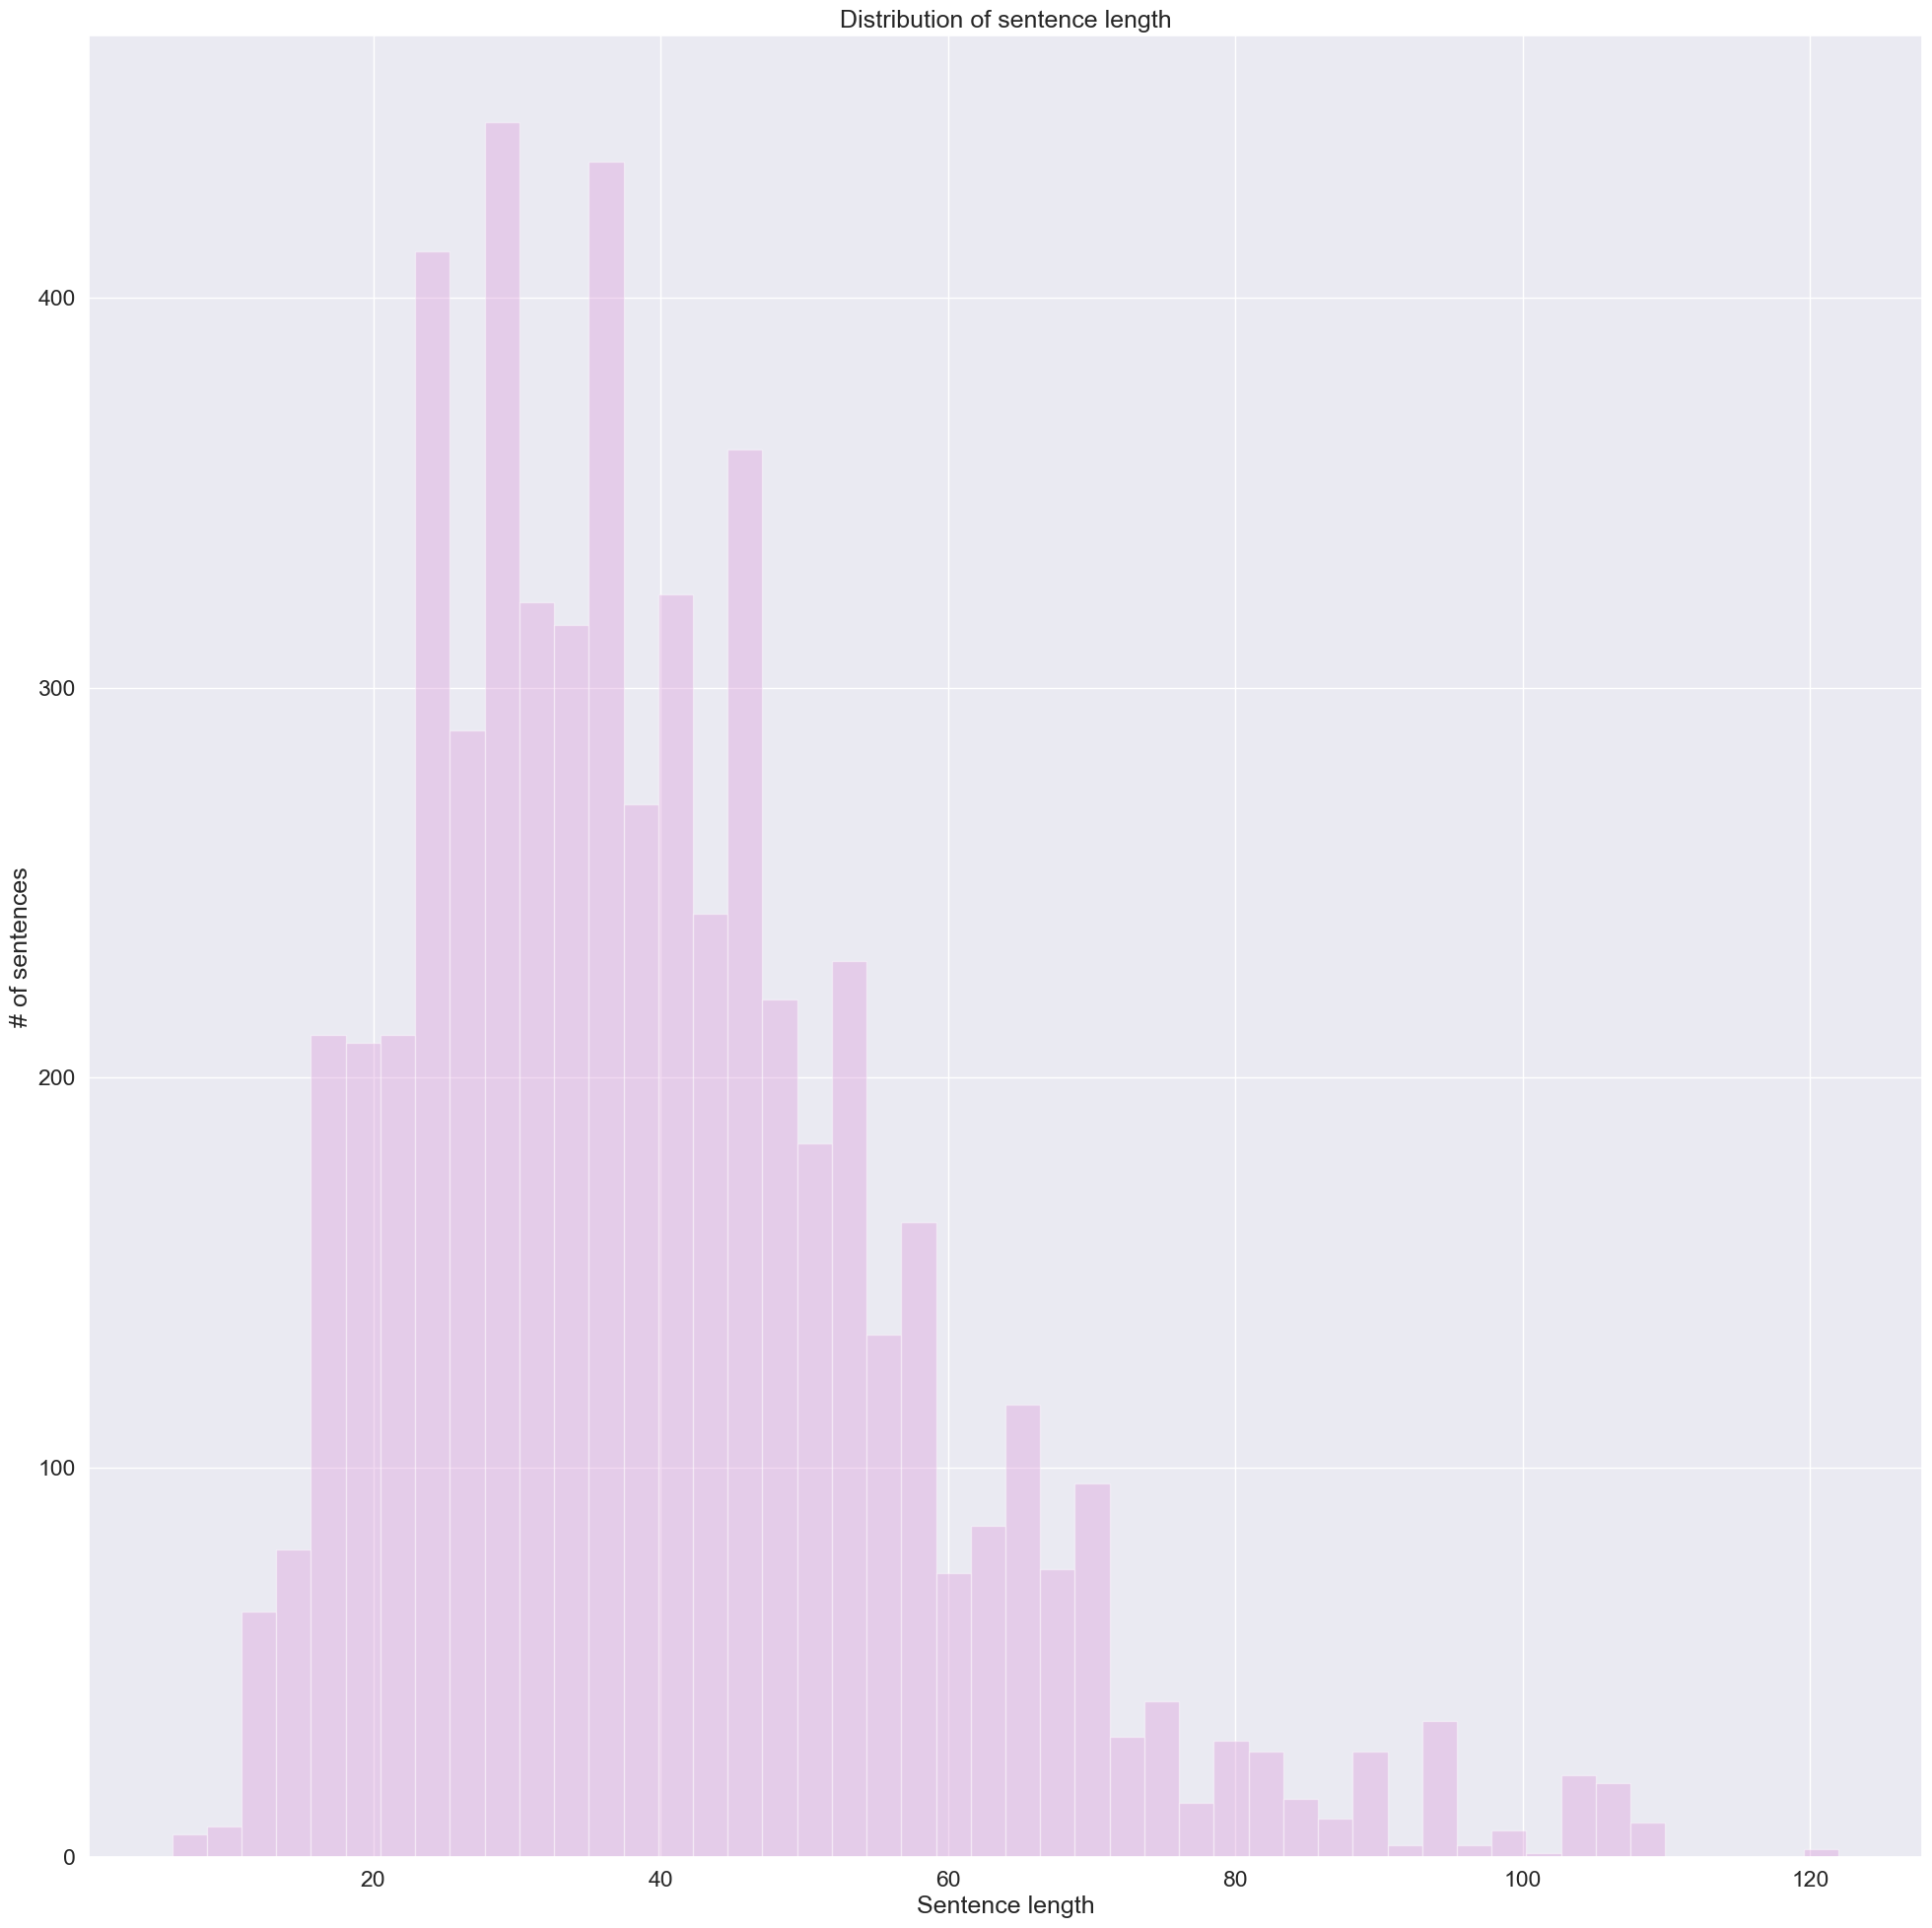

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(24,24))

plt.rcParams["figure.figsize"] = (10,5)

sns.distplot(TokenLength, kde=False, rug=False, color="plum")
plt.title('Distribution of sentence length')
plt.xlabel('Sentence length')
plt.ylabel('# of sentences')

In [16]:
SampleSentence = tokenizer.encode_plus(" ".join(sentences[1]), add_special_tokens= True, truncation = True, padding = "max_length", max_length=130, return_attention_mask = True, return_tensors = "pt")
SampleSentence

{'input_ids': tensor([[  101,  1195,  2592,   170,  1692,  1104,   170,  5351,  1114,   187,
          4638, 10161,  2430,  2386,  1893,  8167, 10721,  5165,  1114,  1822,
           118, 13753,  1899, 12217,  1874, 20192,  1566,   113,  1405, 17713,
           120,  1989,   114,  1150,  1872,  8974,  1114,  1241,   182,   119,
         18436,  1105,   182,   119, 22572, 19773, 16379,  1170,  1103, 16547,
          1104,   170,  5250,  2050, 18994,  5110,   119,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [17]:
unique_labels = set()
for label in labels:
    for l in label:
        unique_labels.add(l)

In [18]:
unique_labels

{'B-drug', 'B-effect', 'I-drug', 'I-effect', 'O'}

In [19]:
#map unique labels to integers
label_map={}
for (i,label) in enumerate(unique_labels):
    label_map[label]=i

In [20]:
label_map

{'O': 0, 'B-effect': 1, 'I-drug': 2, 'B-drug': 3, 'I-effect': 4}

In [21]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

input_ids = []
attention_masks = []

for sent in sentences:

    sent_str = ' '.join(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent_str,
                        add_special_tokens = True,
                        truncation = True,
                        max_length = 130,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )


    input_ids.append(encoded_dict['input_ids'][0])

    # And its attention mask
    attention_masks.append(encoded_dict['attention_mask'][0])

print('Original: ', sentences[24])
print('Token IDs:', input_ids[24])
print('Masks:', attention_masks[24])

Original:  ['Monoclonal', 'gammopathy', 'and', 'subsequent', 'multiple', 'myeloma', 'in', 'a', 'patient', 'on', 'chronic', 'diphenylhydantoin', 'therapy', '.']
Token IDs: tensor([  101, 19863, 13335,  4934,  1348,   176,  2312,  3702, 12233,  1105,
         4194,  2967,  1139, 19773,  1918,  1107,   170,  5351,  1113, 13306,
        20866, 10436,  7777,  7889, 26977,  8136,  1179,  7606,   119,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,

In [22]:
new_labels = []
null_label_id = -100
for (sen, orig_labels) in zip(input_ids, labels):
    padded_labels = []

    orig_labels_i = 0

    for token_id in sen:

        token_id = token_id.numpy().item()

        if (token_id == tokenizer.pad_token_id) or \
            (token_id == tokenizer.cls_token_id) or \
            (token_id == tokenizer.sep_token_id):

            padded_labels.append(null_label_id)

        elif tokenizer.ids_to_tokens[token_id][0:2] == '##':

            padded_labels.append(null_label_id)

        else:

            label_str = orig_labels[orig_labels_i]

            padded_labels.append(label_map[label_str])

            orig_labels_i += 1
    assert(len(sen) == len(padded_labels))

    new_labels.append(padded_labels)


IndexError: list index out of range